In [1]:
import os
import sys

cwd = os.getcwd()
sys.path.insert(0, cwd + "/src")

In [3]:
from dendrotweaks.membrane.io.factory import MechanismFactory
import matplotlib.pyplot as plt

/home/roman/Documents/code/DendroTweaks/app/src


In [4]:
path_to_mod = os.path.join(cwd, "data", "mod")
path_to_python = os.path.join(cwd, "data", "mechanisms")
path_to_templates= os.path.join(cwd, "data", "templates")

factory = MechanismFactory(path_to_mod=path_to_mod, 
                           path_to_python=path_to_python, 
                           path_to_template=path_to_templates)

In [5]:
factory.list_archives()

Available archives in
/home/roman/Documents/code/DendroTweaks/app/src/data/mod:

├── Base/
│   └── Leak
├── Park_2019/
│   ├── Na
│   ├── KCa
│   ├── Kv
│   ├── Ka
│   ├── CaHVA
│   ├── Km
│   └── CaLVA
└── Park_test/
    ├── sNa
    ├── Na
    └── Kv


In [6]:
channel_name="Na"
archive_name="Park_test"

In [7]:
# Create a channel using the factory
channel = factory.create_channel(
    channel_name=channel_name,
    archive_name=archive_name,
    python_template_name="template_dd_new",
    load=True
)

READING
Split content into blocks:
    1 - TITLE
    1 - COMMENT
    1 - NEURON
    1 - UNITS
    1 - PARAMETER
    1 - ASSIGNED
    1 - STATE
    1 - BREAKPOINT
    1 - DERIVATIVE
    1 - INITIAL
    2 - FUNCTION
    1 - PROCEDURE
    0 - KINETIC
No unmatched content.

PARSING
Parsed TITLE block.
Parsed COMMENT block.
Parsed NEURON block.
Parsed UNITS block.
Parsed PARAMETER block.
Parsed ASSIGNED block.
Parsed STATE block.
Parsed BREAKPOINT block.
Parsed DERIVATIVE block.
Parsed INITIAL block.
Parsed FUNCTION block.
Parsed PROCEDURE block.
Restoring expressions in BREAKPOINT
Restoring expressions in DERIVATIVE
Restoring expressions in FUNCTION
Restoring expressions in PROCEDURE

GENERATING
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/mechanisms/Park_test/Na.py
Registering Na from Na in /home/roman/Documents/code/DendroTweaks/app/src/data/mechanisms/Park_test
Importing class Na from module Na.py
/tmp/tmpujuq6shq
Mod files: "./Na.mod"

Creating 'x86_64' directo

/home/roman/anaconda3/envs/dendrotweaks/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating Na.mod into /tmp/tmpujuq6shq/x86_64/Na.c
Thread Safe


 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special
Compiled mod files from "/tmp/tmpujuq6shq"
Loaded mechanism "Na"


In [8]:
standard_channel = factory.create_standard_channel(
    channel_name=channel_name,
    archive_name=archive_name,
    python_template_name="template_dd_new",
    load=True
)

Got data for v in range -100.0 to 100.0 at 23°C
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/mod/Park_test/sNa.mod
/tmp/tmp_ifyg8ax
Mod files: "./sNa.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../sNa.mod
 -> Compiling sNa.c


/home/roman/anaconda3/envs/dendrotweaks/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating sNa.mod into /tmp/tmp_ifyg8ax/x86_64/sNa.c
Thread Safe


 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special
Compiled mod files from "/tmp/tmp_ifyg8ax"
Loaded mechanism "sNa"


Got data for v in range -100.0 to 100.0 at 37°C
Got data for v in range -100.0 to 100.0 at 37°C


Text(0.5, 0.98, 'Channel: Na, Archive: Park_test')

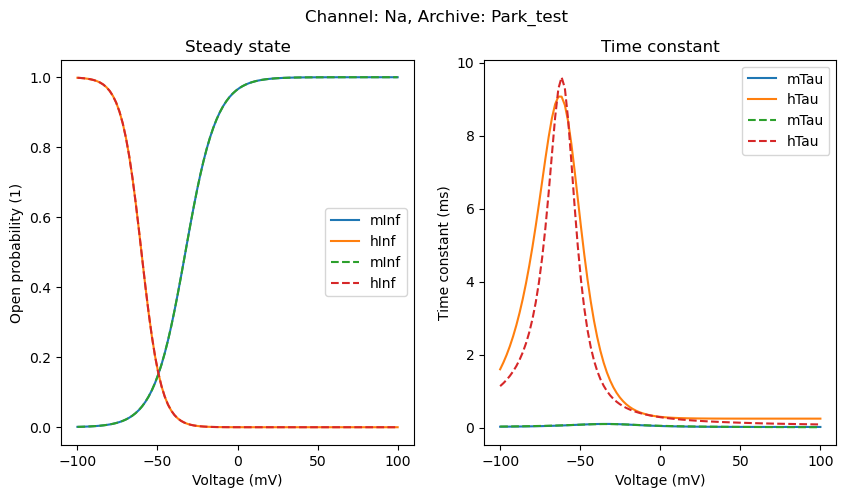

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
standard_channel.plot_kinetics(ax=ax)
channel.plot_kinetics(ax=ax, linestyle="--")
plt.suptitle(f"Channel: {channel_name}, Archive: {archive_name}")

# Test in NEURON

In [11]:
import neuron
from neuron import h

In [12]:
soma = h.Section(name="soma")

In [13]:
soma.insert(channel_name)
soma.insert(f"s{channel_name}")

soma

In [15]:
soma.psection()['density_mechs']

{'Na': {'gbar': [0.0],
  'Rma': [0.182],
  'Rmb': [0.14],
  'v12m': [-30.0],
  'qm': [9.8],
  'Rhb': [0.0091],
  'Rha': [0.024],
  'v12ha': [-45.0],
  'v12hb': [-70.0],
  'qh': [5.0],
  'v12hinf': [-60.0],
  'qhinf': [6.2],
  'i': [0.0],
  'm': [0.0],
  'h': [0.0]},
 'sNa': {'vhalf_m': [-32.571],
  'sigma_m': [9.8],
  'k_m': [1.882],
  'delta_m': [0.541],
  'tau0_m': [0.065],
  'vhalf_h': [-60.0],
  'sigma_h': [-6.2],
  'k_h': [0.018],
  'delta_h': [0.395],
  'tau0_h': [0.797],
  'gbar': [0.0],
  'q10': [2.3],
  'temp': [23.0],
  'i': [0.0],
  'm': [0.0],
  'h': [0.0]}}